## **Industrial copper**


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
import numpy as np

In [115]:
df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df.head(1)

<ipython-input-115-55b52ccaf916>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [117]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [118]:
df.drop('material_ref', axis=1, inplace=True)
df.dropna(how='any')

df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0


In [119]:
df.shape

(181673, 13)

In [120]:
quant = []

for i in df.itertuples():
  if i[3] =="e":
    quant.append(i[0])
quant

[173086]

In [121]:
df.drop(quant, inplace=True)

In [122]:
df['quantity tons'] = df['quantity tons'].apply(lambda i : float(i))

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181671.0,2.020459e+07,4.551123e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181671.0,3.051221e+07,2.433388e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181644.0,4.489284e+01,2.440416e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181648.0,2.561572e+01,1.775419e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181671.0,2.564839e+00,6.572337e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181672.0,1.295288e+03,2.616316e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181672.0,4.739696e+08,7.175117e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181671.0,2.020738e+07,2.411065e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181671.0,1.918042e+03,3.317966e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [124]:
df1 = df[df['quantity tons']>0]
df1.shape

(181668, 13)

In [125]:
df2 = df[df['selling_price']<0]
df2.shape

(5, 13)

In [126]:
df.shape

(181672, 13)

In [127]:
df.loc[df['quantity tons']<0, 'quantity tons'] = df['quantity tons'].mean()

In [128]:
df.loc[df['selling_price']<0, 'selling_price'] = df['selling_price'].mean()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181671.0,2.020459e+07,4.551123e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.875066e+03,2.349081e+06,1.000000e-05,1.097160e+01,3.036546e+01,6.716700e+01,1.000000e+09
customer,181671.0,3.051221e+07,2.433388e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181644.0,4.489284e+01,2.440416e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181648.0,2.561572e+01,1.775419e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181671.0,2.564839e+00,6.572337e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181672.0,1.295288e+03,2.616316e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181672.0,4.739696e+08,7.175117e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181671.0,2.020738e+07,2.411065e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181671.0,1.918110e+03,3.317966e+05,0.000000e+00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [129]:
df.isna().sum()

id                2
item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [130]:
df.shape

(181672, 13)

In [131]:
df.dropna(axis=0, inplace=True)
df.shape

(181635, 13)

In [132]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181635 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181635 non-null  object 
 1   item_date      181635 non-null  float64
 2   quantity tons  181635 non-null  float64
 3   customer       181635 non-null  float64
 4   country        181635 non-null  float64
 5   status         181635 non-null  object 
 6   item type      181635 non-null  object 
 7   application    181635 non-null  float64
 8   thickness      181635 non-null  float64
 9   width          181635 non-null  float64
 10  product_ref    181635 non-null  int64  
 11  delivery date  181635 non-null  float64
 12  selling_price  181635 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 19.4+ MB


In [134]:
df['Date_difference'] = (df['delivery date'] - df['item_date'])
df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [135]:
df2 = df[df['Date_difference']<0]
df2['Date_difference'].value_counts().sum()

16107

In [136]:
df_co = df.copy()

In [137]:
df_fil = df_co[df_co['Date_difference']>0]
df_fil.shape

(165068, 14)

In [138]:
df_fil.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,165068.0,2.020480e+07,4.588722e+03,1.995000e+07,2.020100e+07,2.020120e+07,2.021021e+07,2.021040e+07
quantity tons,165068.0,6.152332e+03,2.461322e+06,1.000000e-05,1.134659e+01,3.052059e+01,6.691798e+01,1.000000e+09
customer,165068.0,3.023335e+07,1.029237e+05,1.245800e+04,3.019689e+07,3.020531e+07,3.028096e+07,3.040818e+07
country,165068.0,4.532004e+01,2.453259e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,165068.0,2.495962e+01,1.763766e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,165068.0,2.607110e+00,3.021227e+00,1.800000e-01,7.400000e-01,1.500000e+00,3.000000e+00,4.000000e+02
width,165068.0,1.300924e+03,2.620794e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,165068.0,4.810751e+08,7.203472e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,165068.0,2.020789e+07,2.521484e+04,2.020080e+07,2.020120e+07,2.021020e+07,2.021050e+07,3.031010e+07
selling_price,165068.0,1.429542e+03,2.461328e+05,0.000000e+00,6.770000e+02,8.180000e+02,9.580000e+02,1.000010e+08


In [139]:
category = ['country', 'status', 'item type', 'application', 'product_ref', 'delivery date']

In [140]:
continuous = ['item_date', 'quantity tons', 'customer', 'thickness', 'width']

In [141]:
from sklearn.preprocessing import OrdinalEncoder
encoded=OrdinalEncoder()
for i in df_fil.select_dtypes(include=["object"]).columns:
  df_fil[i]=encoded.fit_transform(df_fil[[i]])
df_fil.head(1)

<ipython-input-141-4a9f43cac54a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[i]=encoded.fit_transform(df_fil[[i]])
<ipython-input-141-4a9f43cac54a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil[i]=encoded.fit_transform(df_fil[[i]])
<ipython-input-141-4a9f43cac54a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,152282.0,20210401.0,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [142]:
df_fil.drop('id', axis=1, inplace=True)
df_fil.head(1)

<ipython-input-142-fdf5ca2d2109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.drop('id', axis=1, inplace=True)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,20210401.0,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [143]:
df_fil.corr()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
item_date,1.000000,-0.002194,0.001837,-0.020606,0.076236,0.069597,0.003948,-0.008913,0.008216,0.032781,0.095565,0.003357,-0.086492
quantity tons,-0.002194,1.000000,-0.000659,-0.001543,-0.002762,-0.002645,-0.002083,-0.001430,-0.000478,-0.001079,-0.000672,-0.000009,-0.000273
customer,0.001837,-0.000659,1.000000,0.081348,-0.025631,-0.083192,0.010473,0.079997,0.046147,-0.034176,0.001637,-0.000376,0.001304
country,-0.020606,-0.001543,0.081348,1.000000,0.114586,0.144586,-0.012177,-0.045656,0.046705,-0.151469,-0.018798,-0.001862,-0.015061
status,0.076236,-0.002762,-0.025631,0.114586,1.000000,0.254169,0.117895,-0.115313,-0.087054,-0.068245,0.006076,-0.002623,-0.007804
item type,0.069597,-0.002645,-0.083192,0.144586,0.254169,1.000000,0.150917,-0.050054,-0.084231,-0.092540,0.005194,-0.004896,-0.007477
application,0.003948,-0.002083,0.010473,-0.012177,0.117895,0.150917,1.000000,-0.131949,-0.198500,-0.136197,-0.005705,-0.001970,-0.006429
thickness,-0.008913,-0.001430,0.079997,-0.045656,-0.115313,-0.050054,-0.131949,1.000000,0.364002,0.066206,-0.001136,-0.001875,0.000487
width,0.008216,-0.000478,0.046147,0.046705,-0.087054,-0.084231,-0.198500,0.364002,1.000000,-0.032381,-0.003554,0.001204,-0.005054
product_ref,0.032781,-0.001079,-0.034176,-0.151469,-0.068245,-0.092540,-0.136197,0.066206,-0.032381,1.000000,0.011350,-0.001133,0.005389


<Axes: >

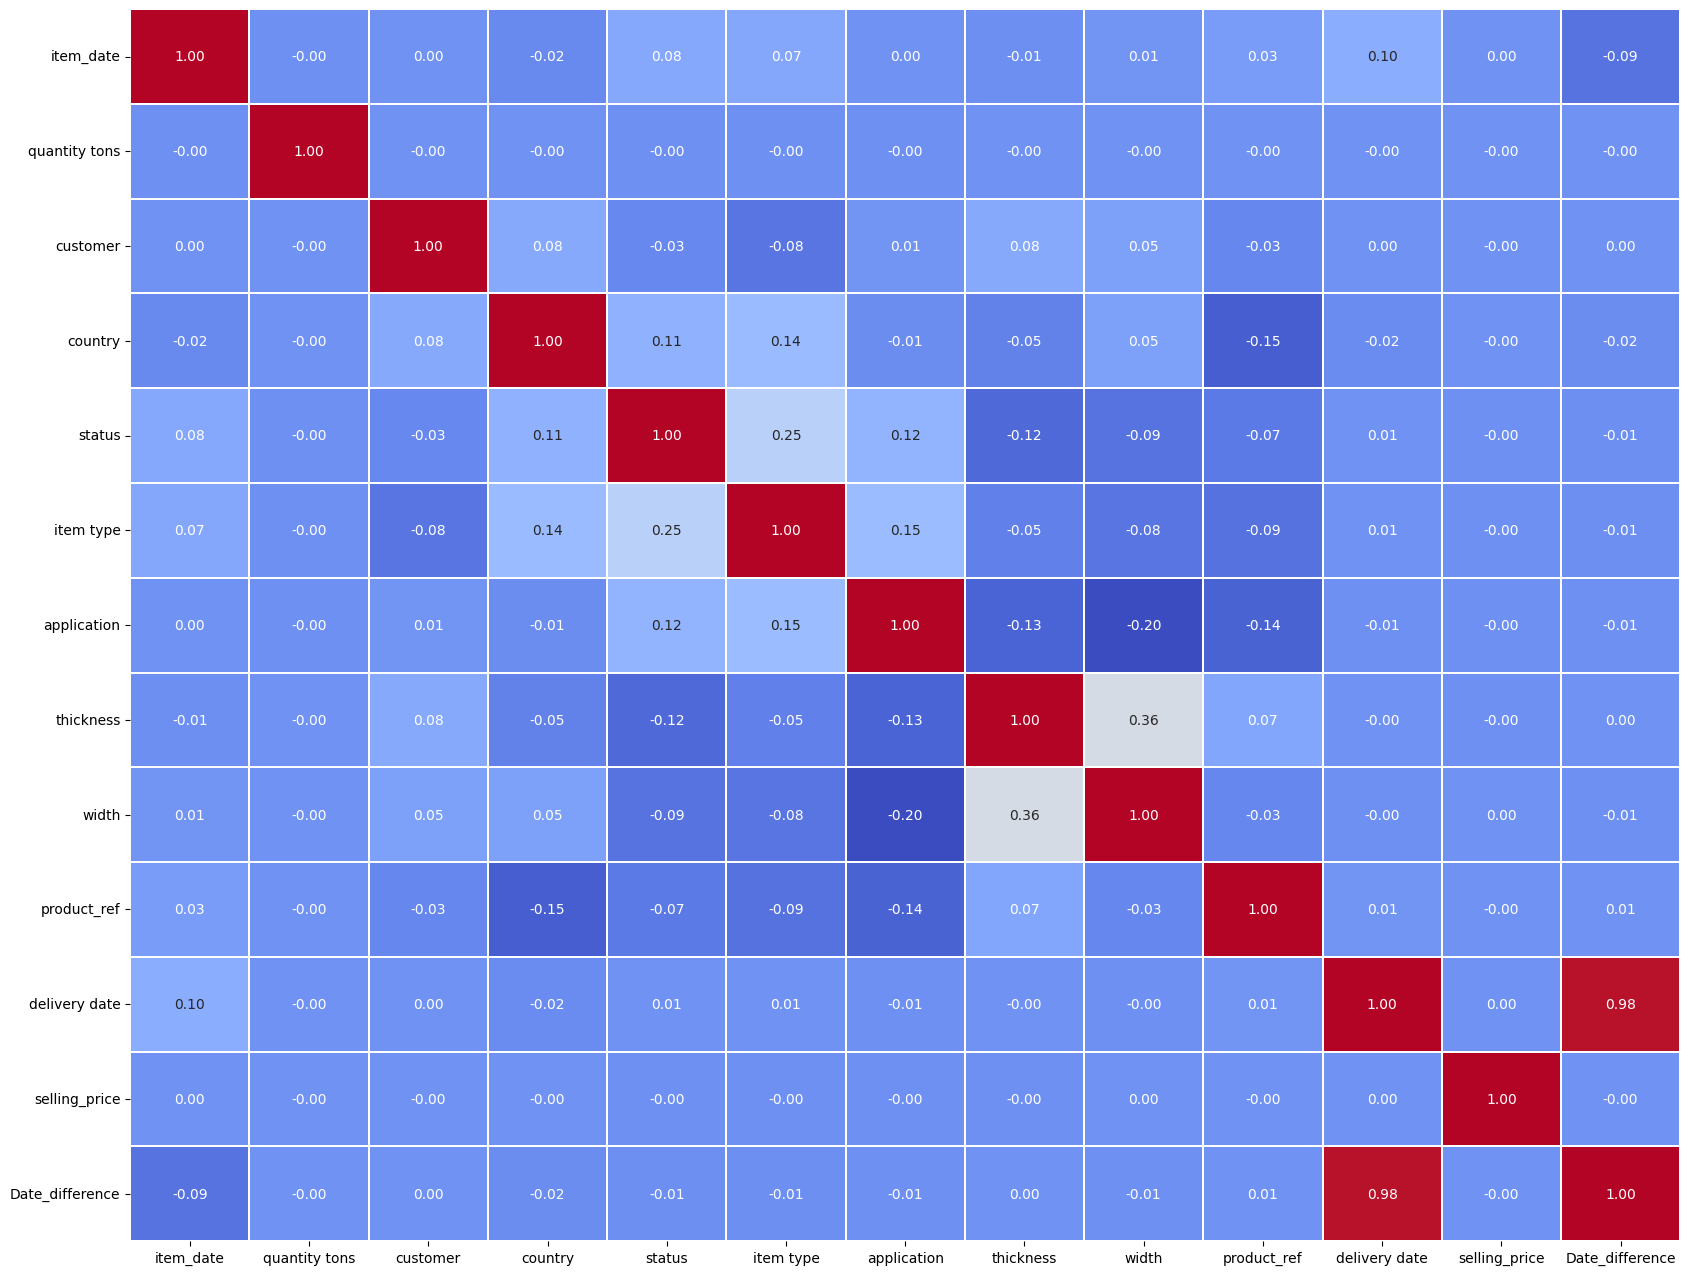

In [144]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df_fil.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [145]:
def two_sample(d1,d2): #continuous vs continuous
  m=[0,0]
  for i in range(31):
      sample1 = d1.sample(frac=0.03)
      sample2 = d2.sample(frac=0.04)
      t_test , p_value = stats.ttest_ind(sample1,sample2) #two_sample t-test
      if p_value < 0.03: #setting critical point , level of significance = 0.03
          m[1]+=1
      else:
          m[0]+=1

  if m[0]>m[1]:
    #print("H0 accept null hypothesis, Ha rejects alternate hypothesis, dependent samples , data is normally distributed")
    return True
  elif m[0]<m[1]:
    #print("H0 Reject null hypothesis, Ha accepts alternate hypothesis , independent samples , data is not normally distributed")
    return False

In [146]:
 #category vs category
def Chi_square1(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2).values)[1] < 0.03 else False

In [147]:
def annova1(c1,c2): #category vs continuous
  group=df[c1].unique()
  data={}
  for i in group:
    data[i]=df_fil[c2][df_fil[c1]==i]
  return False if stats.f_oneway(*[i for i in data.values()])[1] < 0.05 else True

In [148]:
#hypothesis testing
hypo={}
for i in df_fil.columns:
  hypo[i]={}
  for j in df_fil.columns:
    if i=='selling_price' or j=='selling_price':
      continue
    elif i in continuous and j in continuous:
      result=two_sample(df_fil[i],df_fil[j])
    elif i in category and j in category:
      result=Chi_square1(df_fil[i],df_fil[j])
    elif i in category and j in continuous:
      result=annova1(i,j)
    elif i in continuous and j in category:
      result=annova1(j,i)
    if result:
      hypo[i][j]=1
    else:
      hypo[i][j]=0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/usr/local/lib/python3.10/dist-packages/

In [149]:
hypo_df = pd.DataFrame(hypo)
hypo_df.drop("selling_price", axis=1, inplace=True)
hypo_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,Date_difference
item_date,1,0,0,0,1,1,0,0,0,1,1,1
quantity tons,0,1,0,1,1,1,1,0,0,1,1,1
customer,0,0,1,0,1,1,0,0,0,1,1,1
country,0,1,0,1,1,1,1,0,0,1,1,1
status,1,1,1,1,1,1,1,1,1,1,1,1
item type,1,1,1,1,1,1,1,1,1,1,1,1
application,0,1,0,1,1,1,1,0,0,1,1,1
thickness,0,0,0,0,1,1,0,1,0,1,1,1
width,0,0,0,0,1,1,0,0,1,1,1,1
product_ref,1,1,1,1,1,1,1,1,1,1,1,1


In [150]:
#Regression

In [151]:
x = df_fil.drop("selling_price", axis=1)
y = df_fil['selling_price']

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [154]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)

In [155]:
y_predict=model.predict(x_test)

In [156]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

31.046156390980517

In [157]:
MSE=mean_squared_error(y_test,y_predict)
MSE

8224.114125499473

In [158]:
RMSE=np.sqrt(MSE)
RMSE

90.68690162035239

In [159]:
r2=r2_score(y_test,y_predict)
r2

0.8507809869021175

In [160]:
import pickle

In [161]:
#pickle.dump(model, open('model_dt(0.865)', 'wb'))

In [162]:
test_data = np.array([[200401.0, 55, 30156310, 30, 8, 4, 10, 3, 1600, 1670798779, 20210710, 250]])

In [163]:
#file=r"/content/model_dt(0.865)"

In [164]:
#x.head(1)

In [165]:
#test = pickle.load(open(file, 'rb'))

In [166]:
#test.predict(test_data)

In [167]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor().fit(x_train, y_train)

In [168]:
y_predictRF = modelRF.predict(x_test)

In [169]:
MAE_RF=mean_absolute_error(y_test,y_predictRF)
MAE_RF

843.6882067719207

In [170]:
MSE_RF=mean_squared_error(y_test,y_predictRF)
MSE_RF

9359678567.55826

In [171]:
RMSE_RF=np.sqrt(MSE_RF)
RMSE_RF

96745.43176583719

In [172]:
r2_RF=r2_score(y_test,y_predictRF)
r2_RF

-169821.7891116023

In [173]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
modelGB= GradientBoostingRegressor().fit(x_train, y_train)

In [174]:
y_predictGB = modelGB.predict(x_test)

In [175]:
MAE_GB=mean_absolute_error(y_test,y_predictGB)
MAE_GB

4111.660628087466

In [176]:
MSE_GB=mean_squared_error(y_test,y_predictGB)
MSE_GB

214749911049.31842

In [177]:
RMSE_GB=np.sqrt(MSE_GB)
RMSE_GB

463411.16845552874

In [178]:
r2_GB=r2_score(y_test,y_predictGB)
r2_GB

-3896439.309635318

In [179]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
modelAB= AdaBoostRegressor().fit(x_train, y_train)


In [180]:
y_predictAB = modelAB.predict(x_test)

In [181]:
MAE_AB=mean_absolute_error(y_test,y_predictAB)
MAE_AB

104.74195202343162

In [182]:
MSE_AB=mean_squared_error(y_test,y_predictAB)
MSE_AB

26902.49586274631

In [183]:
RMSE_AB=np.sqrt(MSE_AB)
RMSE_AB

164.0198032639544

In [184]:
r2_AB=r2_score(y_test,y_predictAB)
r2_AB

0.5118788697177681

In [185]:
!pip install xgboost

In [186]:
#xg boost
import xgboost as xgb
modelxg = xgb.XGBRegressor().fit(x_train, y_train)


In [187]:
y_predictxg = modelxg.predict(x_test)

In [188]:
mae_xg = mean_absolute_error(y_test, y_predictxg)
mae_xg

35.06127691314755

In [189]:
mse_xg = mean_squared_error(y_test, y_predictxg)
mse_xg

7545.969588973074

In [190]:
rmse_xg = np.sqrt(mse_xg)
rmse_xg

86.86754047958924

In [191]:
r2_xg = r2_score(y_test, y_predictxg)
r2_xg

0.8630852979724657

In [192]:
#pickle.dump(modelxg, open('model_xgboost(0.943)', 'wb'))

In [193]:
#testxg = pickle.load(open('/content/model_xgboost(0.943)', 'rb'))

In [194]:
#testxg.predict(test_data)

In [195]:
#decision tree r2 of 0.865 and xg boost r2 of 0.943 worked well for this data

In [196]:
#classifier

In [197]:
df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [198]:
df_fil2 = df_co[df_co['Date_difference']>0]
df_fil2.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [199]:
df_fil2.drop('id', axis=1, inplace=True)
df_fil2.head(1)

<ipython-input-199-45054aeb7609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil2.drop('id', axis=1, inplace=True)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [200]:
df_cl = df_fil2[df_fil2['status'].isin(['Won', 'Draft'])]
df_cl.shape

(104305, 13)

In [201]:
df_cl['status'].unique()

array(['Won', 'Draft'], dtype=object)

In [202]:
df_cl.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.0,300.0
1,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,20210701.0,18.0,300.0
2,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,20210701.0,1363.0,300.0
3,20210401.0,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,20210701.0,17.0,300.0
4,20210401.0,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,20210701.0,1098.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104300,20200702.0,34.992516,30201370.0,84.0,Won,S,15.0,5.00,1500.0,1671863738,20200901.0,608.0,199.0
104301,20200702.0,52.791503,30201370.0,84.0,Won,S,15.0,4.00,1500.0,1671863738,20200901.0,615.0,199.0
104302,20200702.0,52.514106,30201370.0,84.0,Won,S,15.0,6.00,1500.0,1671863738,20200901.0,612.0,199.0
104303,20200702.0,33.978646,30201370.0,84.0,Won,S,15.0,8.00,1500.0,1671863738,20200901.0,627.0,199.0


In [203]:
df_cl.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [204]:
for i in df_cl.select_dtypes(include=["object"]).columns:
  df_cl[i]=encoded.fit_transform(df_cl[[i]])
df_cl.head(1)

<ipython-input-204-f02ba180d6b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl[i]=encoded.fit_transform(df_cl[[i]])
<ipython-input-204-f02ba180d6b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl[i]=encoded.fit_transform(df_cl[[i]])


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
0,20210401.0,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.0,1500.0,1670798778,20210701.0,854.0,300.0


In [205]:
df_cl.corr()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
item_date,1.000000,-0.006467,0.001194,-0.044908,-0.053896,0.045284,-0.007307,0.006305,0.027684,0.044454,0.568302,0.441795,-0.561057
quantity tons,-0.006467,1.000000,0.013062,-0.034798,0.012852,-0.121716,0.016276,0.007457,0.007143,0.008970,0.009199,-0.031776,0.016580
customer,0.001194,0.013062,1.000000,0.092189,0.032843,-0.145783,0.029989,0.132774,0.060759,-0.045703,0.005777,0.000904,0.004459
country,-0.044908,-0.034798,0.092189,1.000000,-0.013489,0.093611,-0.053445,-0.034632,0.057434,-0.168615,-0.116936,-0.031747,-0.066769
status,-0.053896,0.012852,0.032843,-0.013489,1.000000,0.024765,-0.044766,0.036939,0.006225,0.046899,-0.038874,0.538921,0.021945
item type,0.045284,-0.121716,-0.145783,0.093611,0.024765,1.000000,0.124990,-0.039955,-0.075800,-0.080550,0.029905,0.111341,-0.021211
application,-0.007307,0.016276,0.029989,-0.053445,-0.044766,0.124990,1.000000,-0.103733,-0.203700,-0.113361,-0.000325,0.100341,0.007951
thickness,0.006305,0.007457,0.132774,-0.034632,0.036939,-0.039955,-0.103733,1.000000,0.329282,0.076479,0.016280,-0.228363,0.009235
width,0.027684,0.007143,0.060759,0.057434,0.006225,-0.075800,-0.203700,0.329282,1.000000,-0.040470,-0.011753,-0.140040,-0.043184
product_ref,0.044454,0.008970,-0.045703,-0.168615,0.046899,-0.080550,-0.113361,0.076479,-0.040470,1.000000,0.083316,-0.054031,0.033461


<Axes: >

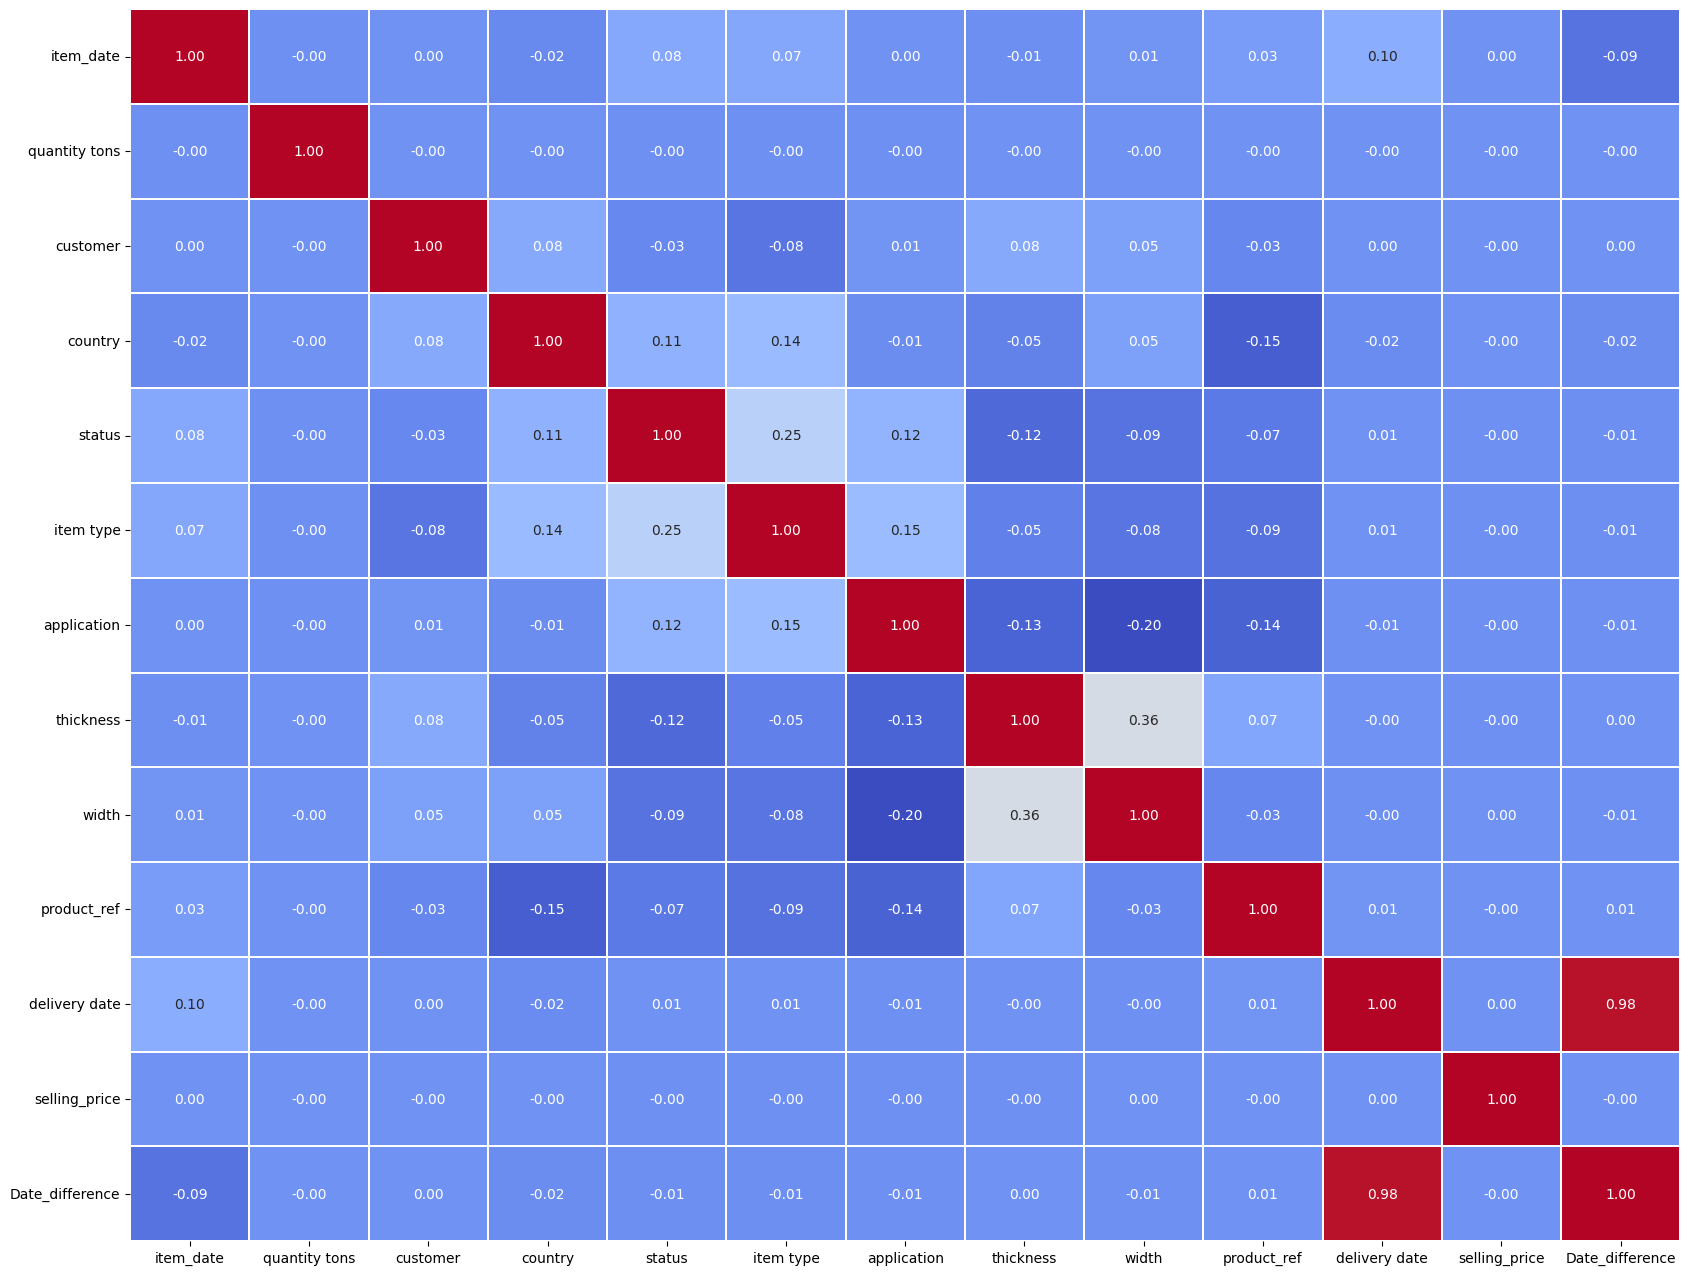

In [206]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df_fil.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [207]:
continuous = ['quantity tons', 'customer', 'thickness', 'width', 'selling_price']

In [208]:
def annova1(c1,c2): #category vs continuous
  group=df_cl[c1].unique()
  data={}
  for i in group:
    data[i]=df_cl[c2][df_cl[c1]==i]
  return False if stats.f_oneway(*[i for i in data.values()])[1] < 0.05 else True

In [209]:
#hypothesis testing
hypo={}
for i in df_cl.columns:
  hypo[i]={}
  for j in df_cl.columns:
    if i=='status' or j=='status':
      continue
    elif i in continuous and j in continuous:
      result=two_sample(df_cl[i],df_cl[j])
    elif i in category and j in category:
      result=Chi_square1(df_cl[i],df_cl[j])
    elif i in category and j in continuous:
      result=annova1(i,j)
    elif i in continuous and j in category:
      result=annova1(j,i)
    if result:
      hypo[i][j]=1
    else:
      hypo[i][j]=0

In [210]:
hypo_df = pd.DataFrame(hypo)
hypo_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,Date_difference
item_date,1,1,0,0,NaN,0,0,0,0,0,0,0,1
quantity tons,1,1,0,0,NaN,0,0,0,0,0,0,0,1
customer,1,0,1,0,NaN,0,0,0,0,0,0,0,1
country,1,0,0,1,NaN,1,1,0,0,1,1,0,1
item type,1,0,0,1,NaN,1,1,0,0,1,1,0,1
application,1,0,0,1,NaN,1,1,0,0,1,1,0,1
thickness,1,0,0,0,NaN,0,0,1,0,0,0,0,1
width,1,0,0,0,NaN,0,0,0,1,0,0,0,1
product_ref,1,0,0,1,NaN,1,1,0,0,1,1,0,1
delivery date,1,0,0,1,NaN,1,1,0,0,1,1,0,1


In [211]:
x = df_cl.drop('status', axis=1)
y = df_cl['status']

In [212]:
x.shape, y.shape

((104305, 12), (104305,))

In [213]:
from imblearn.combine import SMOTETomek
sampler1=SMOTETomek()
x_new,y_new=sampler1.fit_resample(x,y)
x_new.shape,y_new.shape

((203156, 12), (203156,))

In [214]:
#model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [215]:
x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=0.2)

In [216]:
#Decision Tree
model=DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

In [217]:
y_predict=model.predict(x_test)

In [218]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9999753888560741

In [219]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20290
         1.0       1.00      1.00      1.00     20342

    accuracy                           1.00     40632
   macro avg       1.00      1.00      1.00     40632
weighted avg       1.00      1.00      1.00     40632



In [220]:
confusion=confusion_matrix(y_test,y_predict)
confusion

array([[20290,     0],
       [    1, 20341]])

In [221]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_predict_RF = model_RF.predict(x_test)

In [222]:
accuracy_rf=accuracy_score(y_test,y_predict_RF)
accuracy_rf

0.9999753888560741

In [223]:
confusion=confusion_matrix(y_test,y_predict_RF)
confusion

array([[20290,     0],
       [    1, 20341]])

In [224]:
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20290
         1.0       1.00      1.00      1.00     20342

    accuracy                           1.00     40632
   macro avg       1.00      1.00      1.00     40632
weighted avg       1.00      1.00      1.00     40632



In [225]:
#grid search

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models and parameter grids
models = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    })
}

# Perform GridSearchCV for each model
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}")

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit model
    grid_search.fit(X_train, y_train)

    # Store results
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': best_params,
        'Best Model': best_model,
        'Test Accuracy': accuracy
    }

    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Test Accuracy for {model_name}: {accuracy:.2f}\n")

# Review results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  Test Accuracy: {result['Test Accuracy']:.2f}")
    print()


ValueError: Found input variables with inconsistent numbers of samples: [104305, 150]

In [227]:
#after over sampling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Define models and parameter grids
models = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    })
}

# Perform GridSearchCV for each model
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}")

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit model
    grid_search.fit(X_train, y_train)

    # Store results
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': best_params,
        'Best Model': best_model,
        'Test Accuracy': accuracy
    }

    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Test Accuracy for {model_name}: {accuracy:.2f}\n")

# Review results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  Test Accuracy: {result['Test Accuracy']:.2f}")
    print()


Performing GridSearchCV for RandomForest
Fitting 5 folds for each of 36 candidates, totalling 180 fits
